### Continuous Distributions
A coin flip corresponds to a discrete distribution — one that associates positive
probability with discrete outcomes. Often we’ll want to model distributions across a
continuum of outcomes. (For our purposes, these outcomes will always be real numbers,
although that’s not always the case in real life.) For example, the uniform distribution puts
equal weight on all the numbers between 0 and 1.
Because there are infinitely many numbers between 0 and 1, this means that the weight it
assigns to individual points must necessarily be zero. For this reason, we represent a
continuous distribution with a probability density function (pdf) such that the probability
of seeing a value in a certain interval equals the integral of the density function over the
interval

In [2]:
# the density function for uniform dist is just 
def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

In [3]:
uniform_pdf(10)

0

The probability that a random variable following that distribution is between 0.2 and 0.3 is
1/10, as you’d expect. Python’s random.random() is a [pseudo]random variable with a
uniform density.
We will often be more interested in the cumulative distribution function (cdf), which gives
the probability that a random variable is less than or equal to a certain value. It’s not hard
to create the cumulative distribution function for the uniform distribution:
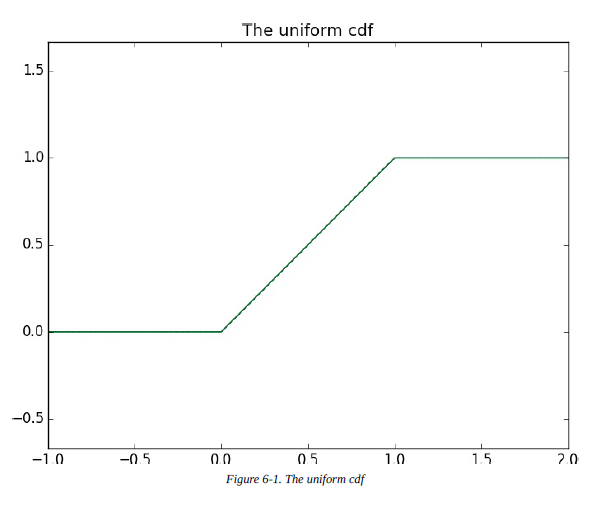

In [11]:
def uniform_cdf(x):
    "returns the probability that a uniform random variable is <= x"
    if x < 0: return 0 # uniform random is never less than 0
    elif x < 1: return x # e.g. P(X <= 0.4) = 0.4
    else: return 1 # uniform random is always less than 1

### recall that the std is just how far data points in a data are spread and variance tells the actual diff bw data points and their mean

### The Normal Distribution
The normal distribution is the king of distributions. It is the classic bell curve–shaped
distribution and is completely determined by two parameters: its mean (mu) and its
standard deviation (sigma). The mean indicates where the bell is centered, and the
standard deviation how “wide” it is.
It has the distribution function:
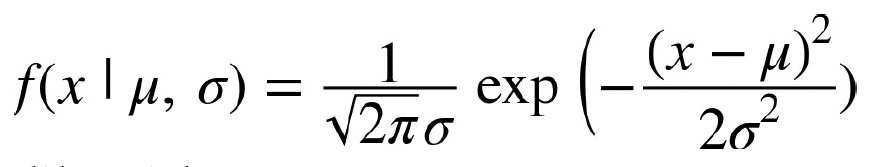

In [15]:
# the above can be implemented as 
import math
def normal_pdf(x, mu=0, sigma=1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

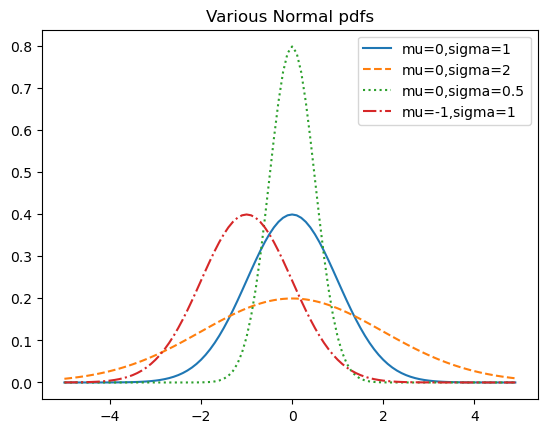

In [16]:
import matplotlib.pyplot as plt
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_pdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

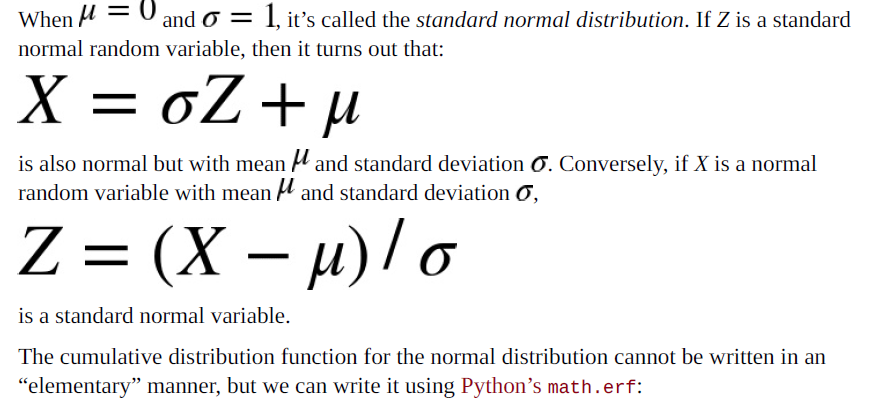

In [18]:
def normal_cdf(x, mu=0,sigma=1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

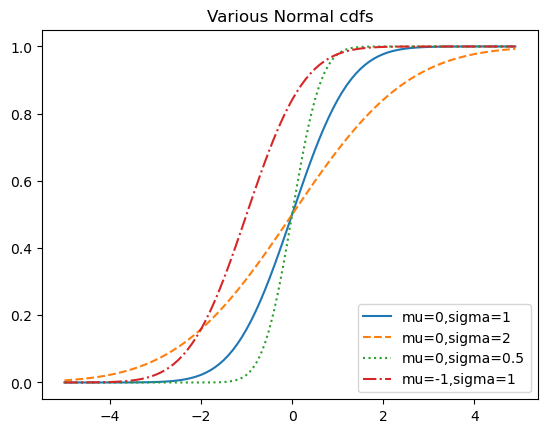

In [20]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=1')
plt.legend(loc=4) # bottom right
plt.title("Various Normal cdfs")
plt.show()

Sometimes we’ll need to invert normal_cdf to find the value corresponding to a specified
probability. There’s no simple way to compute its inverse, but normal_cdf is continuous
and strictly increasing, so we can use a binary search:

In [21]:
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """find approximate inverse using binary search"""
    # if not standard, compute standard and rescale
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z, low_p = -10.0, 0 # normal_cdf(-10) is (very close to) 0
    hi_z, hi_p = 10.0, 1 # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2 # consider the midpoint
        mid_p = normal_cdf(mid_z) # and the cdf's value there
        if mid_p < p:
            # midpoint is still too low, search above it
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            # midpoint is still too high, search below it
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z
    """The function repeatedly bisects intervals until it narrows in on a Z that’s close enough to
        the desired probability."""

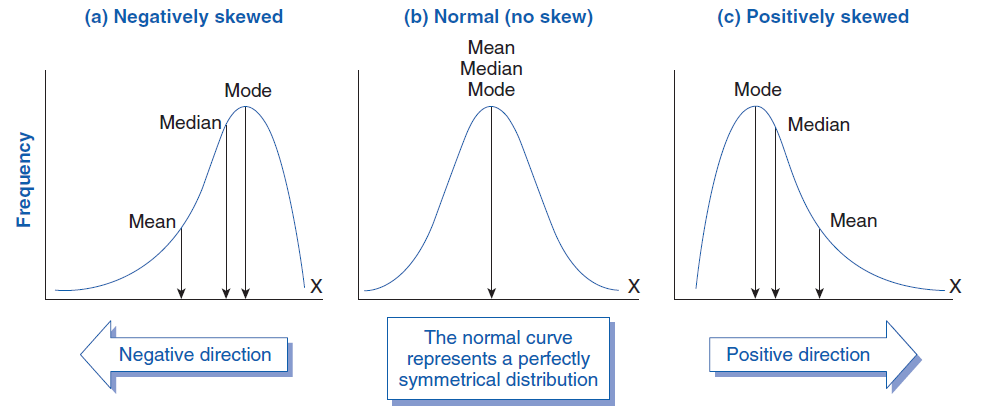

### The Central Limit Theorem
One reason the normal distribution is so useful is the central limit theorem, which says (in
essence) that a random variable defined as the average of a large number of independent
and identically distributed random variables is itself approximately normally distributed.
In particular `x1 ,.... xn `, if are random variables with mean (mu) and standard deviation (sigma),
and if n is large, then:
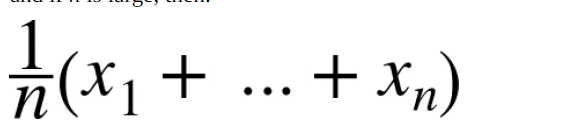
is approximately normally distributed with mean(mu) and standard deviation `sigma/sqrt(n)`.
Equivalently (but often more usefully) 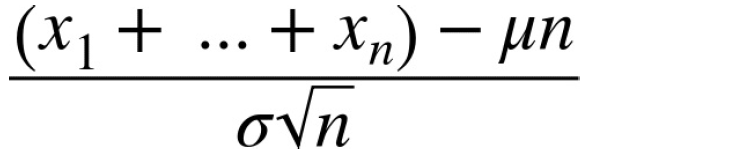,
is approximately normally distributed with mean 0 and standard deviation 1.

An easy way to illustrate this is by looking at binomial random variables, which have two
parameters n and p. A Binomial(n,p) random variable is simply the sum of n independent
Bernoulli(p) random variables, each of which equals 1 with probability p and 0 with
probability `1-p`:

In [23]:
import random
def bernoulli_trial(p):
    return 1 if random.random() < p else 0
def binomial(n,p):
    return sum(bernoulli_trial(p) for _ in range(n))

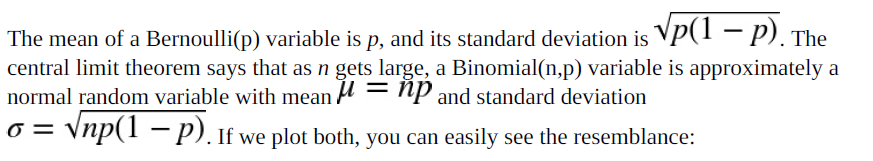

In [26]:
from collections import Counter
def make_hist(p,n ,num_points):
    data = [binomial(n,p) for _ in range(num_points)]
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
        [v / num_points for v in histogram.values()],
        0.8,
        color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    # use a line chart to show the normal approximation
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
    for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

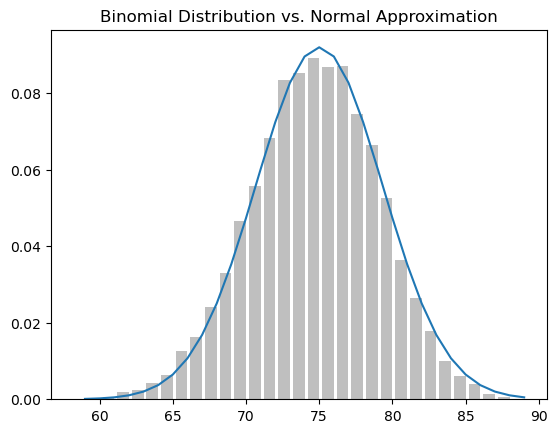

In [27]:
make_hist(0.75, 100, 10000)

The moral of this approximation is that if you want to know the probability that (say) a
fair coin turns up more than 60 heads in 100 flips, you can estimate it as the probability
that a Normal(50,5) is greater than 60, which is easier than computing the
Binomial(100,0.5) cdf. (Although in most applications you’d probably be using statistical
software that would gladly compute whatever probabilities you want.)

### For Further Exploration
- scipy.stats contains pdf and cdf functions for most of the popular probability
  distributions.
- Remember how, at the end of Chapter 5, I said that it would be a good idea to study a
  statistics textbook? It would also be a good idea to study a probability textbook. The
  best one I know that’s available online is Introduction to Probability.